In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, dct
from scipy.special import eval_chebyt

In [50]:
def DCT(f, direction='forward'):
    # Discrete cosine transform 
    # The algorithm utilizes {ej}
    # f: {fj: j=0,1,...N}
    # The algorithm requires real DFT
    # N must be even
    
    N = len(f)-1
    
    if N%2 != 0:
        print("Please use even N")
        return
    
    # Auxiliary constant c_bar
    # c_bar = 2 for j=0, N
    # c_bar = 1 for j=1,...,N-1
    c = np.ones(f.shape)
    c[0] = 2
    c[-1] = 2
    
    # Construct {ej}
    f_rev = f[-1::-1]
    J = np.arange(0, N+1)
    angles = J * np.pi/N
    e = 0.5 * (f + f_rev) - (f - f_rev) * np.sin(angles)
    e = e[:-1]
    
    # Calculate DCT coefficients {ak}
    a_, b_ = DFT_real(e)
    a = np.zeros(f.shape)
    a[0::2] = a_
    a[1] = 2/N * np.sum(f / c * np.cos(angles))
    
    for k in range(1, N//2):
        a[2*k+1] = a[2*k-1] + b_[k]
    
    # The backward transform is N/2 times the forward
    if direction=='forward':
        return a
    else:
        return a * N/2

In [24]:
def DFT_real(x):
    # David's version of real DFT
    # The input x must be real
    
    N = len(x)
    
    if N%2 != 0:
        print('Please use even length')
        return
    
    M = N//2
    
    X = fft(x) / N
    
    a = 2 * np.real(X[:M+1])
    b = -2 * np.imag(X[:M+1])
    
    return a, b
    

In [25]:
f = np.array([1,2,3,4,5])
N = len(f)-1

In [26]:
# Comparison with scipy dct
# scipy dct returns N * DCT(f)
print("My DCT\n", DCT(f))
print("scipy dct\n", dct(f, type=1))
print("scipy dct rescaled\n", dct(f, type=1)/N)

My DCT
 [ 6.         -1.70710678  0.         -0.29289322  0.        ]
scipy dct
 [24.         -6.82842712  0.         -1.17157288  0.        ]
scipy dct rescaled
 [ 6.         -1.70710678  0.         -0.29289322  0.        ]


In [27]:
N = 12
f = np.random.rand(N+1)
# Comparison with scipy dct
print("My DCT\n", DCT(f))
print("scipy dct rescaled\n", dct(f, type=1)/N)

My DCT
 [ 1.13550976  0.12495049 -0.15837986  0.10470633 -0.07713142 -0.11558456
  0.02372918  0.04533872  0.21385423  0.01532368 -0.13783117  0.07321491
  0.00212586]
scipy dct rescaled
 [ 1.13550976  0.12495049 -0.15837986  0.10470633 -0.07713142 -0.11558456
  0.02372918  0.04533872  0.21385423  0.01532368 -0.13783117  0.07321491
  0.00212586]


In [45]:
def ChebT(f, direction='forward'):
    # Calculate the coefficients in the Chebyshev interpolation
    # f: {fj: j=0,1,...N}
    # The algorithm requires DCT
    # N must be even
    N = len(f)-1
    
    if N%2 != 0:
        print("Please use even N")
        return
    if direction=='forward':
        a = DCT(f)
        a[0] *= 0.5
        a[-1] *= 0.5
    else: # backward
        f[0] *= 2
        f[-1] *= 2
        a = DCT(f, direction='backward')
    
    return a

In [46]:
def ChebT_scipy(f, direction='forward'):
    # Calculate the coefficients in the Chebyshev interpolation
    # f: {fj: j=0,1,...N}
    # The algorithm requires DCT
    # N must be even
    N = len(f)-1
    
    if N%2 != 0:
        print("Please use even N")
        return
    if direction=='forward':
        # using scipy dct
        a = dct(f, type=1) / N
        a[0] *= 0.5
        a[-1] *= 0.5
    else: # backward
        f[0] *= 2
        f[-1] *= 2
        a = dct(f, type=1) / 2
    return a

In [51]:
# Verification of the chebyshev coefficients
f = np.array([1,2,3,4,5])
f_tilde = ChebT(f)
f_tilde_scipy = ChebT_scipy(f)
print("Chebyshev coefficients\n", f_tilde)
print("Chebyshev coefficients scipy\n", f_tilde_scipy)
# Verification of the backward transform
f_backward = ChebT(f_tilde, direction='backward')
f_backward_scipy = ChebT_scipy(f_tilde_scipy, direction='backward')
print("Backward Chebyshev\n", f_backward)
print("Backward Chebyshev scipy\n", f_backward_scipy)

Chebyshev coefficients
 [ 3.         -1.70710678  0.         -0.29289322  0.        ]
Chebyshev coefficients scipy
 [ 3.         -1.70710678  0.         -0.29289322  0.        ]
Backward Chebyshev
 [1. 2. 3. 4. 5.]
Backward Chebyshev scipy
 [1. 2. 3. 4. 5.]


In [53]:
# More verification of the chebyshev coefficients
N = 12
f = np.random.rand(N+1)
f_tilde = ChebT(f)
f_tilde_scipy = ChebT_scipy(f)
print("Chebyshev coefficients\n", f_tilde)
print("Chebyshev coefficients scipy\n", f_tilde_scipy)
# Verification of the backward transform
f_backward = ChebT(f_tilde, direction='backward')
f_backward_scipy = ChebT_scipy(f_tilde_scipy, direction='backward')
print("Original function\n", f)
print("Backward Chebyshev\n", f_backward)
print("Backward Chebyshev scipy\n", f_backward_scipy)


Chebyshev coefficients
 [ 3.33837235e-01  1.55600410e-01  1.11956569e-01 -1.81393716e-01
 -7.42681906e-02 -1.73400087e-01  2.29877360e-04  6.05906696e-02
  7.49515724e-02 -3.17506728e-02  4.91039927e-02 -3.41621540e-02
 -2.96823393e-02]
Chebyshev coefficients scipy
 [ 3.33837235e-01  1.55600410e-01  1.11956569e-01 -1.81393716e-01
 -7.42681906e-02 -1.73400087e-01  2.29877360e-04  6.05906696e-02
  7.49515724e-02 -3.17506728e-02  4.91039927e-02 -3.41621540e-02
 -2.96823393e-02]
Original function
 [0.26161317 0.36026331 0.58697804 0.9181918  0.44097161 0.16338783
 0.14354784 0.3055677  0.00605399 0.10728688 0.18124917 0.32641993
 0.67064427]
Backward Chebyshev
 [0.26161317 0.36026331 0.58697804 0.9181918  0.44097161 0.16338783
 0.14354784 0.3055677  0.00605399 0.10728688 0.18124917 0.32641993
 0.67064427]
Backward Chebyshev scipy
 [0.26161317 0.36026331 0.58697804 0.9181918  0.44097161 0.16338783
 0.14354784 0.3055677  0.00605399 0.10728688 0.18124917 0.32641993
 0.67064427]


In [32]:
def ChebT_1stDeri_ByRecursion(f):
    # Calculating the coefficients of the derivative 
    # of the truncated Chebyshev series by the recursion formula
    # f: coefficients of the truncated Chebyshev series
    # fk: k=0,1,...,N
    
    N = len(f) - 1
    if N<=2:
        print("Too few input elements")
        return
    
    # Initialize the derivative coeffficients
    F = np.zeros(N+1) # Fk: k=0,1,...,N
    F[-1] = 0 # FN=0
    F[-2] = 2*N*f[-1]
    
    # Solving other coefficients
    for k in range(N-2, 0, -1):
        F[k] = F[k+2] + 2 * (k+1) * f[k+1]
    
    F[0] = 0.5 * F[2] + f[1]
    
    return F

In [54]:
def ChebT_1stDeri(f):
    # Calculate the coefficients of the 1st derivative expansion
    # f: {fj: j=0,1,...N}
    # N must be even
    
    N = len(f)-1
    
    if N%2 != 0:
        print("Please use even N")
        return
    
    f_cheb = ChebT(f)
    f_1stderi_cheb = ChebT_1stDeri_ByRecursion(f_cheb)
    
    return ChebT(f_1stderi_cheb, direction='backward')
    
    

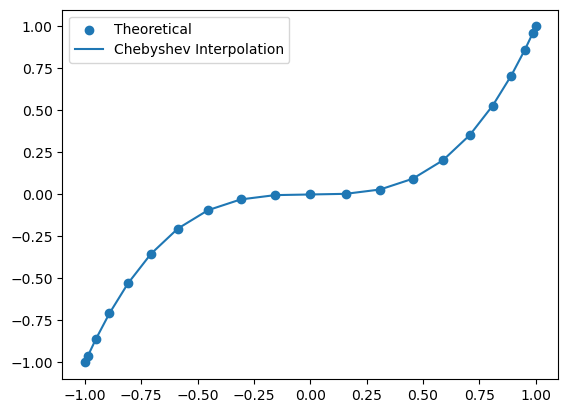

In [55]:
# Testing the interpolation
N = 20
J = np.arange(0, N+1)
x = np.cos(J * np.pi/N)
f = x**3
f_cheb = ChebT(f)
f_interp = np.zeros(N+1)
for k in range(N+1):
    f_interp += f_cheb[k] * eval_chebyt(k, x)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x, f, label='Theoretical')
ax.plot(x, f_interp, label='Chebyshev Interpolation')
ax.legend()

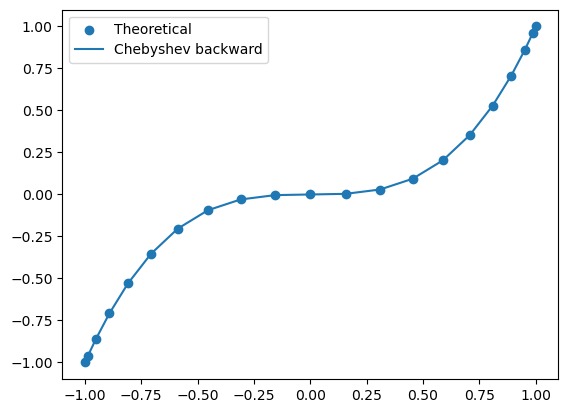

In [56]:
# Testing the backward transformation
f_cheb = ChebT(f)
f_cheb_backward = ChebT(f_cheb, direction='backward')
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x, f, label='Theoretical')
ax.plot(x, f_cheb_backward, label='Chebyshev backward')
ax.legend()

Text(0.5, 1.0, 'Derivative')

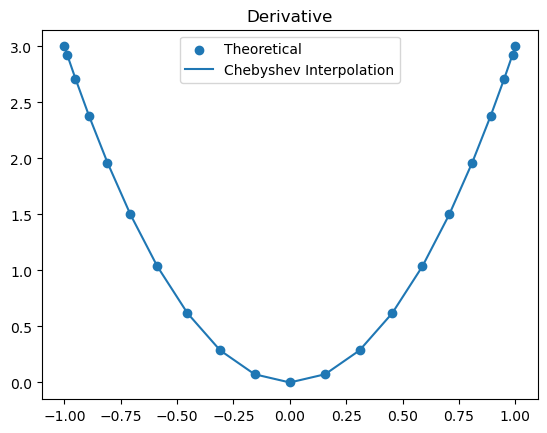

In [57]:
# Testing the derivative
f_deri = 3 * x**2
f_deri_cheb = ChebT_1stDeri(f)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x, f_deri, label='Theoretical')
ax.plot(x, f_deri_cheb, label='Chebyshev Interpolation')
ax.legend()
ax.set_title('Derivative')